## Batch1 vs Batch 2 11mix_vs_10mix top 500 genes

Importing libraries

In [1]:
import decoupler as dc
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


# Only needed for visualization:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from anndata import AnnData

Reading data from tsv Batch1 ctrl_vs_11mix IHWallGenes and Batch2 ctrl_vs_11mix IHWallGenes

Selecting only the TOP 100 GENES and the columns "log2FoldChange","pvalue","padj","gene_name"

In [2]:
# Batch1 ctrl_vs_11mix IHWallGenes and Batch2 ctrl_vs_11mix IHWallGenes
b1_11mix_vs_10mix_all = "/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/batch1/paired_grp/deseq2_11mix_vs_10mix/11mix_10mix_IHWallGenes.tsv"
b2_11mix_vs_10mix_all = "/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/batch2/paired_grp/deseq2_11mix_vs_10mix/11mix_10mix_IHWallGenes.tsv"

b1_11mix_vs_10mix_all = pd.read_csv(b1_11mix_vs_10mix_all, sep="\t")
b2_11mix_vs_10mix_all = pd.read_csv(b2_11mix_vs_10mix_all, sep="\t")

In [3]:
#B1 
b1_11mix_vs_10mix_500 = b1_11mix_vs_10mix_all.iloc[0:500,:]
b1_11mix_vs_10mix_500 = b1_11mix_vs_10mix_500[["log2FoldChange","pvalue","padj","gene_name"]]
# B2
b2_11mix_vs_10mix_500 = b2_11mix_vs_10mix_all.iloc[0:500,:]
b2_11mix_vs_10mix_500= b2_11mix_vs_10mix_500[["log2FoldChange","pvalue","padj","gene_name"]]


Check that the genes only appear once 

In [4]:
b2_11mix_vs_10mix_500["gene_name"].value_counts().max()

2

In [5]:
b2_11mix_vs_10mix_500["gene_name"].value_counts().max()

2

Creating a dataframe for each batch with only gene_name information

In [6]:
b1_11mix_vs_10mix_500_gene = pd.DataFrame(b1_11mix_vs_10mix_500["gene_name"])

In [7]:
b1_11mix_vs_10mix_500_gene 

,gene_name
0,Dynlt1c
1,Gm49519
2,Prkcsh
3,Mtch1
4,Car9
...,...
495,Avil
496,Svbp
497,1700123O20Rik
498,Rin1


In [8]:
b2_11mix_vs_10mix_500_gene = pd.DataFrame(b2_11mix_vs_10mix_500["gene_name"])

In [9]:
b2_11mix_vs_10mix_500_gene 

,gene_name
0,Eif4ebp3
1,Lcn2
2,Cxcl5
3,Cxcl2
4,Misp3
...,...
495,Arhgap26
496,Gm37140
497,Ccn1
498,Chst8


Finding common elements between the 2 datasets (b1 and b2 ctrl_vs_11mix)

In [10]:
common_b1_b2_11mix_vs_10mix = list(set(b1_11mix_vs_10mix_500_gene.gene_name) & set(b2_11mix_vs_10mix_500_gene.gene_name))

In [11]:
len(common_b1_b2_11mix_vs_10mix)

19

In [12]:
# The union of the genes present in the All genes table from Batch1 and Batch2 
genes_universe = list(set(b1_11mix_vs_10mix_all.gene_name) & set(b2_11mix_vs_10mix_all.gene_name))

In [13]:
len(genes_universe)

15818

In [14]:
common_b1_b2_11mix_vs_10mix

['Jcad',
 'Gm45501',
 'Gm43560',
 'Cxcl5',
 'Gm38366',
 'Gm16001',
 'Rem2',
 'U6',
 'Rragd',
 'U2',
 'U1',
 'Gm5914',
 'St6galnac6',
 'Slc41a1',
 'Tmem231',
 'Serpine1',
 'Pbp2',
 'Gm37140',
 'Cxcl2']

Findinf the rows in the original dataframe with all the information

In [15]:
b1_common = b1_11mix_vs_10mix_500[b1_11mix_vs_10mix_500["gene_name"].isin(common_b1_b2_11mix_vs_10mix)]
b1_common

,log2FoldChange,pvalue,padj,gene_name
23,-1.204755,0.002409,1.0,St6galnac6
28,-5.521438,0.003201,1.0,Gm43560
36,5.347851,0.004273,1.0,Gm37140
44,2.801380,0.005707,1.0,Cxcl2
49,-10.621564,0.006557,1.0,U1
64,2.321095,0.008048,1.0,Serpine1
71,1.742918,0.008793,1.0,Cxcl5
102,-2.905714,0.012607,1.0,Gm5914
130,-4.947403,0.016339,1.0,U6
180,0.975101,0.022888,1.0,Pbp2


In [16]:
b2_common = b2_11mix_vs_10mix_500[ b2_11mix_vs_10mix_500["gene_name"].isin(common_b1_b2_11mix_vs_10mix)]
b2_common

,log2FoldChange,pvalue,padj,gene_name
2,2.175691,3.520338e-10,0.000007,Cxcl5
3,4.105552,2.056211e-08,0.000031,Cxcl2
42,-1.246190,2.487257e-04,0.464153,St6galnac6
73,4.795002,7.008279e-04,0.235102,Gm43560
152,11.966925,2.191201e-03,0.140777,U1
171,-2.669612,2.757110e-03,0.191804,Gm5914
185,0.811429,3.096933e-03,0.158127,Rragd
220,1.294976,3.889465e-03,0.167935,Gm38366
223,0.895126,3.914319e-03,0.167935,Jcad
253,1.606311,4.790679e-03,0.235102,Rem2


### Fisher exact test
Test if the number of common genes is larger than what would be obtained by chance

In [17]:
b1_and_b2 = len(common_b1_b2_11mix_vs_10mix)
notb1_onlyb2 = 500 - b1_and_b2
notb2_onlyb1 = 500 - b1_and_b2
notb1_notb2 = len(genes_universe)
oddsratio, pvalue = fisher_exact([[b1_and_b2, notb1_onlyb2], [notb2_onlyb1, notb1_notb2]])
pvalue

0.2826725470492857

In [18]:
oddsratio

1.2990175526558063

The p value is less than 5% (0.05), therefore we conclude that our observation is statistically significant. 
### The number of intersected genes is higher than what we would expect by random chance.  

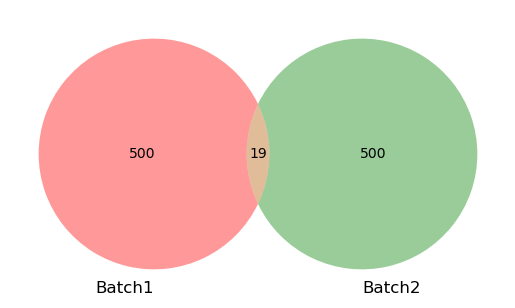

In [19]:
# plot intersection
venn2(subsets = (len(b1_11mix_vs_10mix_500), len(b2_11mix_vs_10mix_500), len(common_b1_b2_11mix_vs_10mix)), set_labels = ('Batch1', 'Batch2'))
plt.show()